# IMPORTS

In [36]:
import geopandas as gpd
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs
import contextily as ctx
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
import folium

# GEODATAFRAMES

GeoPandas GeoDataFrames are like pandas dataframes with a geometry column. The geometry columns provide the geographic shapes, points, lines, polygons, etc. for the map.

In [37]:
# read in example geodataframe using geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [38]:
# read in geojson to create geodataframe
# source: geoplot datasets using geopandas - gpd.read_file(gplt.datasets.get_path('contiguous_usa')), 2019 gdp source: Wikipedia, Bureau of Economic Analysis
# shapefiles can be converted to geojson using QGIS
path = 'https://raw.githubusercontent.com/groundhogday321/map-layers/main/us_states.geojson'
us_states = gpd.read_file(path)
us_states.head()

,state,population,gdp,geometry
0,Minnesota,5303925,379388000000,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,989415,51934000000,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,672591,54044000000,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,1567582,85552000000,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,6724540,632013000000,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [39]:
# read in shapefile
# data source: https://maps.indiana.edu/layerGallery.html?category=Census
path = '/Users/ryannoonan/Desktop/indiana_counties_shapefile/indiana_counties.shp'
in_counties = gpd.read_file(path)
in_counties.head()

,NAME_U,NAME_L,POP2000,POP2020,geometry
0,STEUBEN,Steuben,33214,34435,"POLYGON ((-84.84041 41.76011, -84.82062 41.760..."
1,LAGRANGE,Lagrange,34909,40446,"POLYGON ((-85.21560 41.75973, -85.19665 41.759..."
2,ELKHART,Elkhart,182791,207047,"POLYGON ((-85.67938 41.75914, -85.65994 41.759..."
3,ST JOSEPH,St Joseph,265559,272912,"POLYGON ((-86.08140 41.76065, -86.06265 41.760..."
4,LAKE,Lake,484564,498700,"POLYGON ((-87.50003 41.76018, -87.22329 41.760..."


# CONVERT PANDAS DATAFRAME TO GEODATAFRAME

In [40]:
# pandas dataframe to geopandas dataframe (tallest buildings)
path = 'https://raw.githubusercontent.com/groundhogday321/dataframe-datasets/master/tallest_buildings_with_lat_lon.csv'
tallest_buildings = pd.read_csv(path)
tb_gdf = gpd.GeoDataFrame(tallest_buildings, 
                          geometry=gpd.points_from_xy(tallest_buildings.Longitude, 
                                                      tallest_buildings.Latitude))
tb_gdf.head()

,Building,City,Country,Height,Floors,Year,Latitude,Longitude,geometry
0,Burj Khalifa,Dubai,United Arab Emirates,2717,163,2010,25.197031,55.274222,POINT (55.27422 25.19703)
1,Shanghai Tower,Shanghai,China,2073,128,2015,31.235646,121.501266,POINT (121.50127 31.23565)
2,Abraj Al-Bait Clock Tower,Mecca,Saudi Arabia,1971,120,2012,21.419323,39.826697,POINT (39.82670 21.41932)
3,Ping An Finance Center,Shenzhen,China,1965,115,2017,22.536724,114.050355,POINT (114.05036 22.53672)
4,Lotte World Tower,Seoul,South Korea,1819,123,2016,37.511104,127.098233,POINT (127.09823 37.51110)


# BASIC MAP

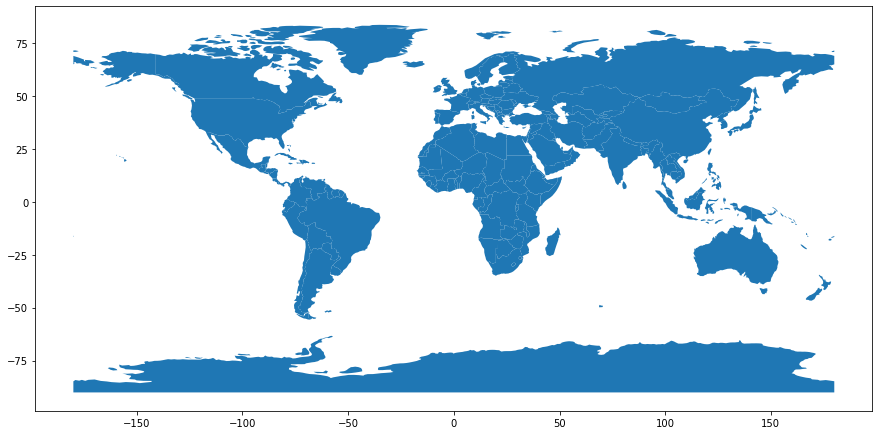

In [41]:
world.plot(figsize=(15, 10));

# VISUALIZE A SPECIFIC GEOGRAPHIC COUNTRY/REGION

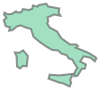

In [42]:
regions = world.set_index('name')
regions.loc['Italy', 'geometry']

# PLOT POINTS

In [43]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))[197:]
cities.tail()

,name,geometry
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)
201,Singapore,POINT (103.85387 1.29498)


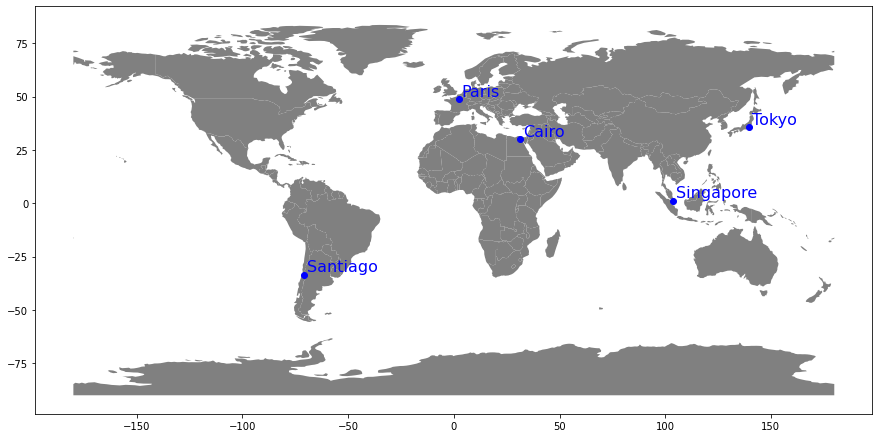

In [44]:
# plot cities and annotate
# plt.subplots creates a figure and a set of subplots where subplots defaults to 1
fig, ax = plt.subplots(figsize=(15, 10))
# ax (axes) is the area/subplot on which to draw the plot
world.plot(ax=ax, color='grey')
cities.plot(ax=ax, color='blue');
for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
    # xytext is similar to offset
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', size=16, color='blue')

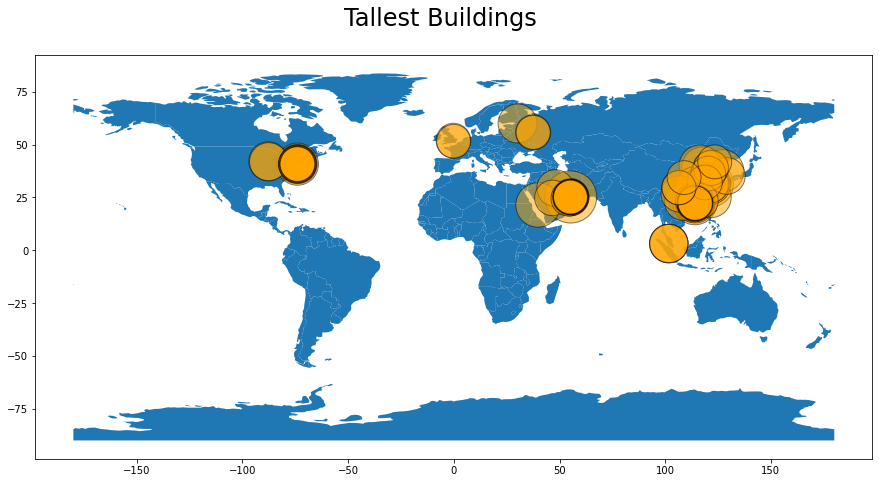

In [68]:
# plot points where marker size is based on data column (using pandas dataframe converted to geodataframe)
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax)
tb_gdf.plot(ax=ax, color='orange', markersize=tb_gdf.Height, alpha=0.5, edgecolor='k');
fig.suptitle('Tallest Buildings', y=0.85, fontsize=24);

# CHOROPLETH MAP

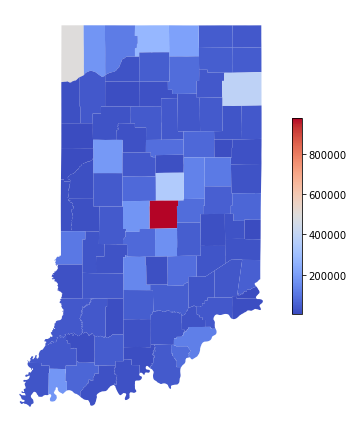

In [46]:
fig, ax = plt.subplots(figsize=(6, 12))
in_counties.plot(ax=ax, column='POP2020', cmap='coolwarm', legend=True, legend_kwds={'shrink': 0.3})
ax.axis('off');

# GROUPING - AGGREGATION WITH DISSOLVE

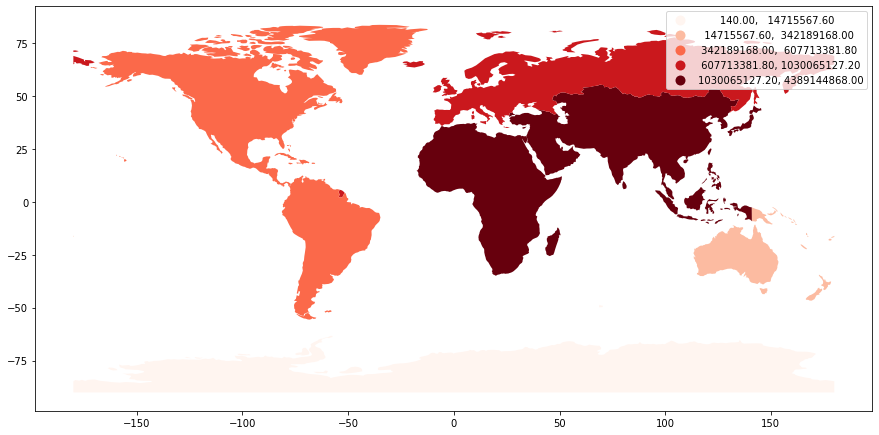

In [47]:
fig, ax = plt.subplots(figsize=(15, 10))
grouped = world[['continent', 'geometry', 'pop_est']]
continents = grouped.dissolve(by='continent', aggfunc='sum')
continents.plot(ax=ax,
                column='pop_est', 
                scheme='quantiles', 
                cmap='Reds', 
                legend=True);

# ADDING A BACKGROUND MAP TO PLOTS
### using contextily

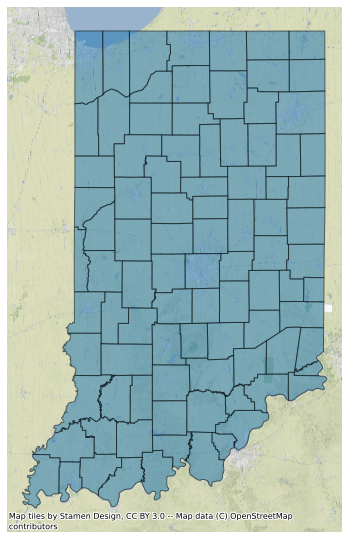

In [33]:
# web map tiles are typically provided in Web Mercator projection (EPSG 3857)
# *** this can take several minutes to run ***
fig, ax = plt.subplots(figsize=(6, 12))
in_counties.to_crs(epsg=3857).plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, zoom=12)
ax.axis('off');

# FILTER

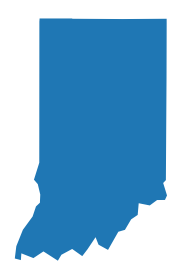

In [48]:
fig, ax = plt.subplots(figsize=(3, 6))
us_states[us_states['state'] == 'Indiana'].plot(ax=ax);
plt.axis('off');

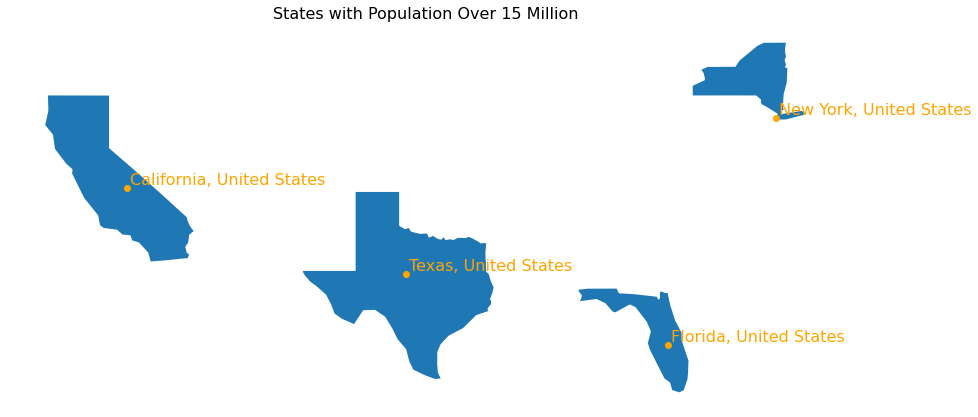

In [49]:
# filter example using geocode
fig, ax = plt.subplots(figsize=(15, 10))
filter_states = us_states[us_states['population'] > 15_000_000]
filter_states.plot(ax=ax);
ax.set_title('States with Population Over 15 Million', fontsize=16)
ax.axis('off')

# geocoding to find location markers
locations = gpd.tools.geocode(filter_states.state, provider='nominatim', user_agent='tutorial')
locations.plot(ax=ax, color='orange');

# labels
for x, y, label in zip(locations.geometry.x, locations.geometry.y, locations.address):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', size=16, color='orange')

# CENTROIDS

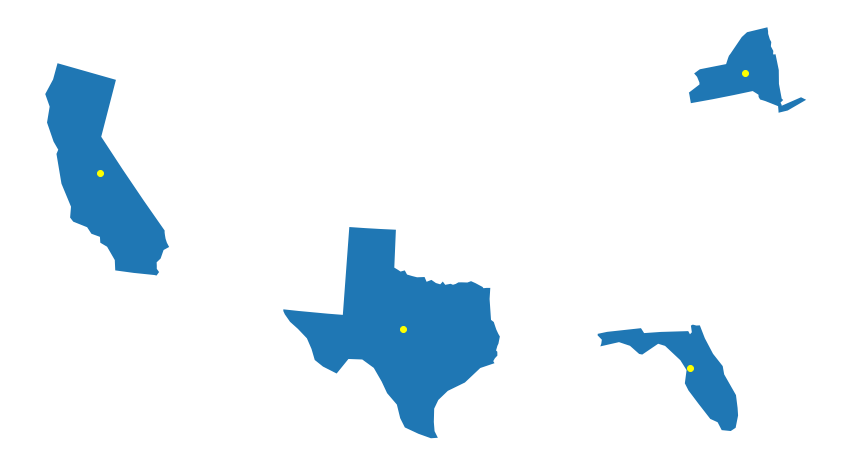

In [50]:
# finding centroids
# in some cases you may need to change a crs for better correctness (change crs from geographic to projected)
fig, ax = plt.subplots(figsize=(15, 10))
# we will use epsg=5070 for the Albers Equal Area crs
filter_states_albers = filter_states.to_crs(epsg=5070)
# set_index is used to help us better see our results when we do calculations
filter_states_albers = filter_states_albers.set_index('state')
filter_states_albers.plot(ax=ax)
centroids = filter_states_albers.geometry.centroid
centroids.plot(ax=ax, color='yellow')
ax.axis('off');

In [51]:
# view crs details
# see difference between Geographic & Projected
filter_states.crs
# filter_states_albers.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# DISTANCE BETWEEN CENTROIDS

In [52]:
filter_states_albers['centroid'] = centroids
filter_states_albers

,population,gdp,geometry,centroid
state,,,,
California,37253956,3120386000000,"POLYGON ((-1662616.859 1427983.300, -1649793.7...",POINT (-2045444.467 1827518.744)
Texas,25145561,1772132000000,"POLYGON ((229947.869 907437.341, 238739.912 89...",POINT (-312329.095 935601.965)
Florida,18801310,1111614000000,"POLYGON ((1587067.801 557918.432, 1596320.654 ...",POINT (1322743.917 710011.526)
New York,19378102,1705127000000,"POLYGON ((1755364.435 2236530.682, 1740544.137...",POINT (1637590.447 2394293.716)


In [53]:
# distance from Texas centroid to centroids of California, Florida, New York
# distances in this example in meters
state_centroid = filter_states_albers['centroid'].loc['Texas']
distances_between_centroids = filter_states_albers['centroid'].distance(state_centroid)
distances_between_centroids

state
California    1.949155e+06
Texas         0.000000e+00
Florida       1.650562e+06
New York      2.435153e+06
dtype: float64

In [54]:
# units in miles (meters to miles)
distances_in_miles = distances_between_centroids*0.00062137
distances_in_miles = distances_in_miles.apply("{0:,.0f}".format)
distances_in_miles

state
California    1,211
Texas             0
Florida       1,026
New York      1,513
dtype: object

# AREA

In [55]:
filter_states_albers.area

state
California    4.131808e+11
Texas         6.912872e+11
Florida       1.540637e+11
New York      1.378614e+11
dtype: float64

In [56]:
# units are in meters squared
# check crs details for measurement unit details
# show units as km2 and square miles
for i in filter_states_albers.itertuples():
    km2 = i.geometry.area/10**6
    sq_mi = i.geometry.area*3.861E-7
    print(f'{i.Index} {km2:,.0f} km\N{SUPERSCRIPT TWO}')
    print(f'{i.Index} {sq_mi:,.0f} square miles\n')

California 413,181 km²
California 159,529 square miles

Texas 691,287 km²
Texas 266,906 square miles

Florida 154,064 km²
Florida 59,484 square miles

New York 137,861 km²
New York 53,228 square miles



In [57]:
# all states areas
all_states_albers = us_states.to_crs(epsg=5070).set_index('state')

for i in all_states_albers.itertuples():
    km2 = i.geometry.area/10**6
    sq_mi = i.geometry.area*3.861E-7
    print(f'{i.Index} {sq_mi:,.0f} square miles')
    print(f'{i.Index} {km2:,.0f} km\N{SUPERSCRIPT TWO}\n')

Minnesota 87,372 square miles
Minnesota 226,295 km²

Montana 145,558 square miles
Montana 376,996 km²

North Dakota 70,657 square miles
North Dakota 183,003 km²

Idaho 83,278 square miles
Idaho 215,690 km²

Washington 66,942 square miles
Washington 173,380 km²

Arizona 113,797 square miles
Arizona 294,735 km²

California 159,529 square miles
California 413,181 km²

Colorado 104,175 square miles
Colorado 269,813 km²

Nevada 111,232 square miles
Nevada 288,091 km²

New Mexico 122,561 square miles
New Mexico 317,434 km²

Oregon 96,983 square miles
Oregon 251,186 km²

Utah 84,696 square miles
Utah 219,363 km²

Wyoming 98,879 square miles
Wyoming 256,097 km²

Arkansas 53,172 square miles
Arkansas 137,717 km²

Iowa 56,294 square miles
Iowa 145,801 km²

Kansas 82,312 square miles
Kansas 213,188 km²

Missouri 69,323 square miles
Missouri 179,545 km²

Nebraska 77,136 square miles
Nebraska 199,782 km²

Oklahoma 69,900 square miles
Oklahoma 181,041 km²

South Dakota 77,873 square miles
South Dako

# BUFFER
buffer returns a GeoSeries of geometries representing all points within a given distance of each geometric object

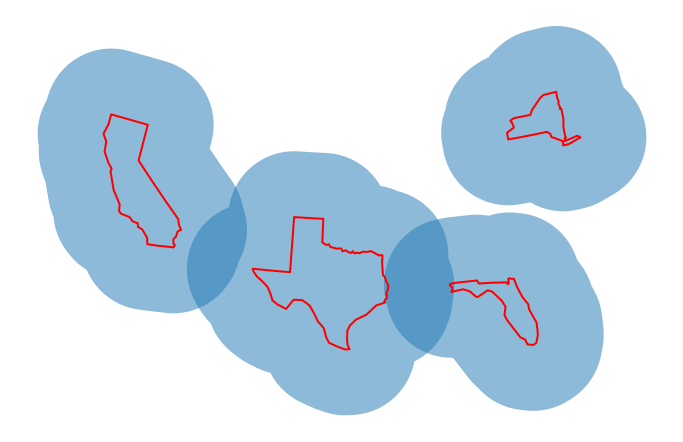

In [69]:
filter_states_albers_buffer = us_states[us_states['population'] > 15_000_000]
filter_states_albers_buffer = filter_states_albers_buffer.to_crs(epsg=5070).set_index('state')
filter_states_albers_buffer['boundary'] = filter_states_albers_buffer.boundary
# buffer in meters - 600_000 meters is about 370 miles (units may differ)
filter_states_albers_buffer['buffered'] = filter_states_albers_buffer.buffer(600_000)
ax = filter_states_albers_buffer['buffered'].plot(figsize=(12, 8), alpha=0.5)
filter_states_albers_buffer['boundary'].plot(ax=ax, color='red', linewidth=2)
plt.axis('off');

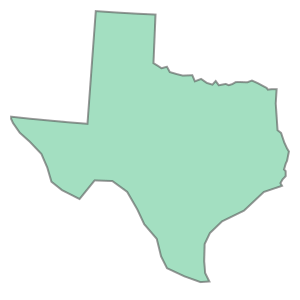

In [59]:
texas = filter_states_albers_buffer.loc['Texas', 'geometry']
texas

# INTERSECTION

In [60]:
# determine if buffer intersects with state boundary
filter_states_albers_buffer['buffered'].intersects(texas)

state
California    False
Texas          True
Florida        True
New York      False
dtype: bool

# GEOPANDAS WITH FOLIUM

In [70]:
m = folium.Map(location=[39.85, -86.14], zoom_start=6, tiles='CartoDB positron')
m

In [62]:
# folium uses latitude and longitude so we will use epsg 4326
in_counties_4326 = in_counties.to_crs(epsg=4326)

for i in in_counties_4326.itertuples():
    # simplify geometry
    in_counties_simplified = gpd.GeoSeries(i.geometry).simplify(tolerance=0.001)
    # to json
    to_json = in_counties_simplified.to_json()
    # to geojson
    to_geo_json = folium.GeoJson(data=to_json, style_function=lambda x: {'fillColor': 'orange'})
    # add popup labels
    folium.Popup(i.NAME_L).add_to(to_geo_json)
    # add geojson to map
    to_geo_json.add_to(m)
m

# GEOPANDAS WITH CARTOPY

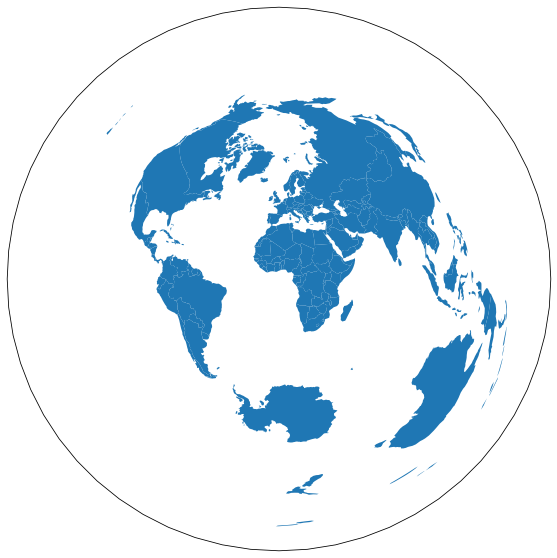

In [63]:
# coordinate reference system
crs = ccrs.AzimuthalEquidistant()

# figure, plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': crs})

# convert crs to be compatible with geopandas
world_cartopy = world.to_crs(crs.proj4_init)

# plot
ax.add_geometries(world_cartopy['geometry'], crs=crs);

In [72]:
world_cartopy.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((0.000 -18226859.390, 0.000 -18..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3773783.317 -111480.284, 3792495.521..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-888747.964 3071386.452, -889073.430..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-7277763.517 9955846.760, -727..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-7277763.517 9955846.760, -730..."


# GEOPANDAS WITH GEOPLOT SUBPLOTS

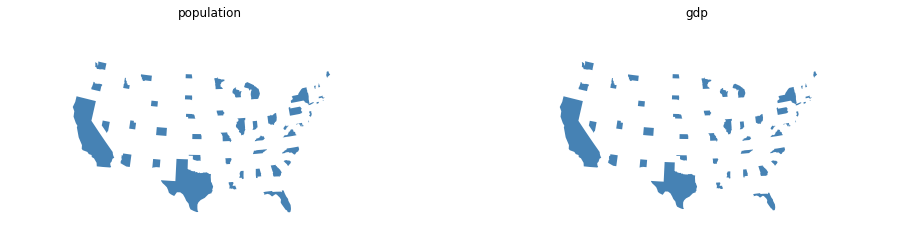

In [65]:
# create figure and subplots
proj = gcrs.AlbersEqualArea(central_latitude=40, central_longitude=-97)
fig = plt.figure(figsize=(16, 8))
ax1 = plt.subplot(121, projection=proj)
ax2 = plt.subplot(122, projection=proj)

# cartogram for population
population = gplt.cartogram(df=us_states,
                            scale='population',
                            projection=gcrs.AlbersEqualArea(),
                            ax=ax1)

population.set_title('population')

# cartogram for gdp
gdp = gplt.cartogram(df=us_states,
                     scale='gdp',
                     projection=gcrs.AlbersEqualArea(),
                     ax=ax2)

gdp.set_title('gdp');

# EXPORT

In [74]:
# export geopandas data to other types of files
path_to_data = gpd.datasets.get_path('nybb')
gdf = gpd.read_file(path_to_data)

# excel
gdf.to_excel('/Users/ryannoonan/Desktop/gdf.xlsx')

# geojson
gdf.to_file('/Users/ryannoonan/Desktop/geopandas_map.geojson', driver='GeoJSON')

# take out driver for default shapefile
gdf.to_file('/Users/ryannoonan/Desktop/geopandas_map.shapefile')